### Import Libraries

In [5]:
import os, sys, ast
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import pandas as pd
from utils import crop, plot_cropped_fig, load_resized_data, save_crop_gif

### Read Bounding Boxes data

In [ ]:
data = pd.read_csv('/projects/renal/01_kidney_segmentation/semi_supervised/01_mean_teacher/boxes_generation/bbox_csv/binary labeled boxes/kidney_bbox_unlabeled_test_set.csv')

### Crop to bounding box

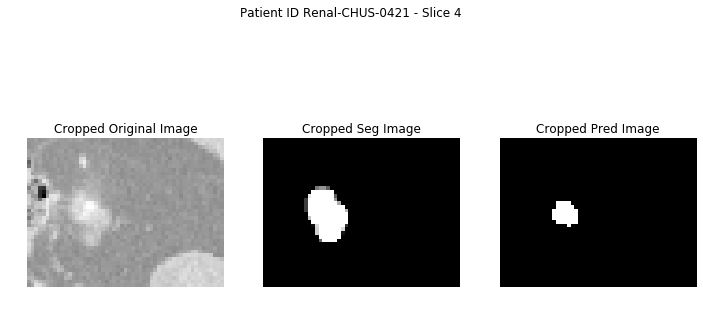

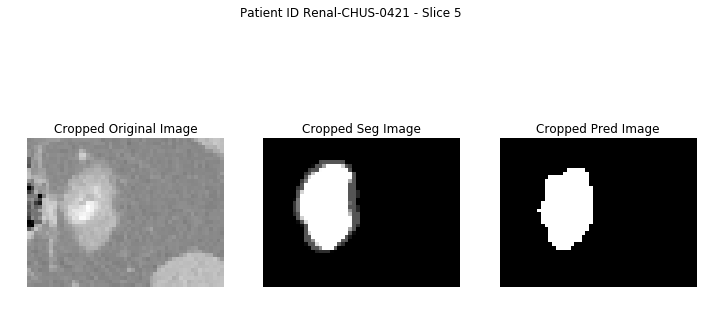

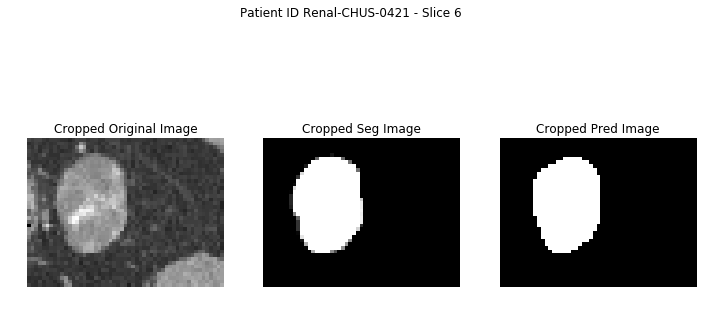

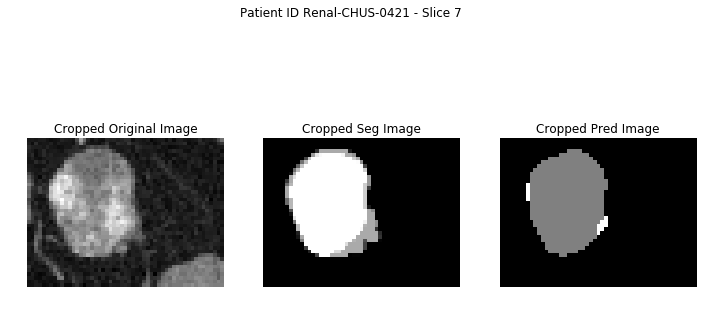

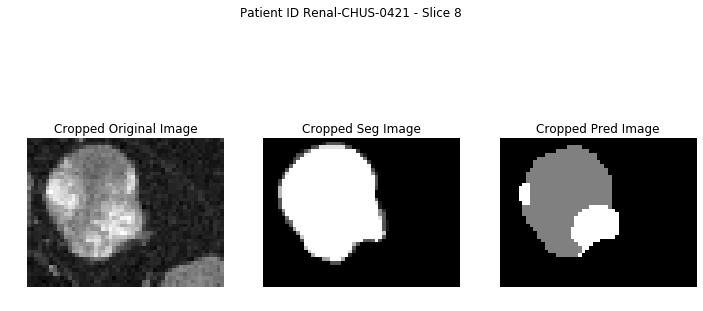

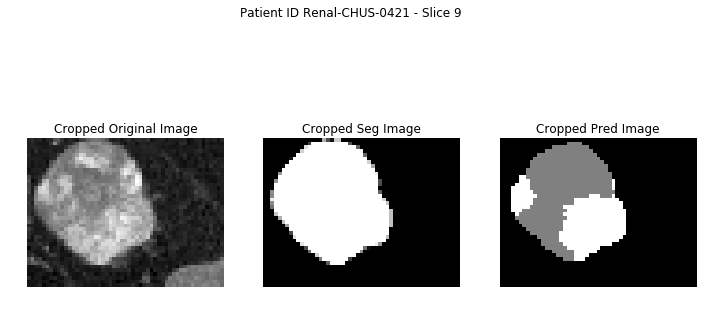

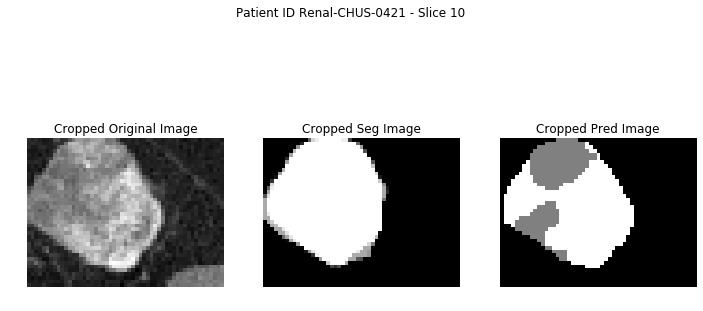

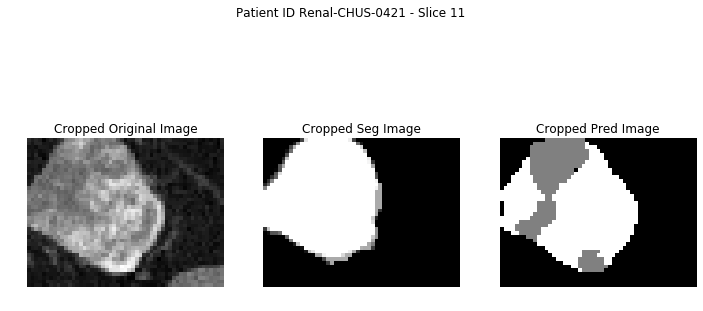

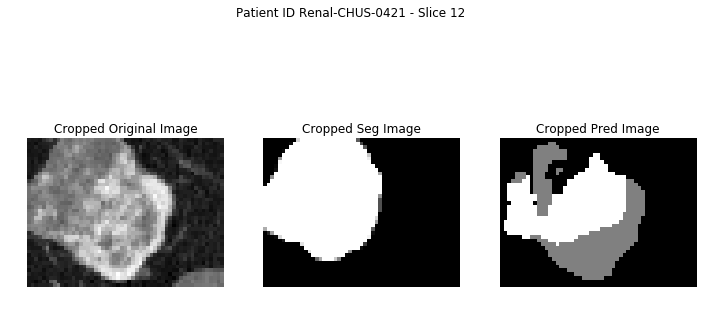

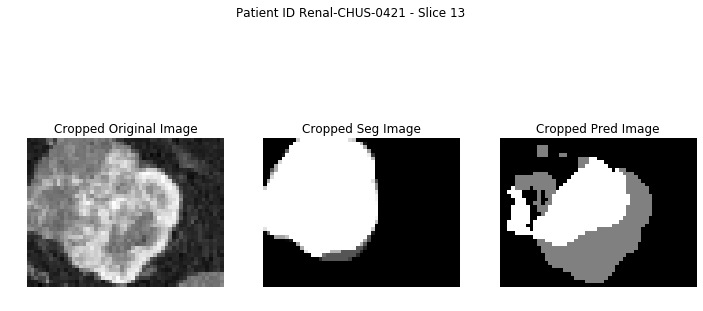

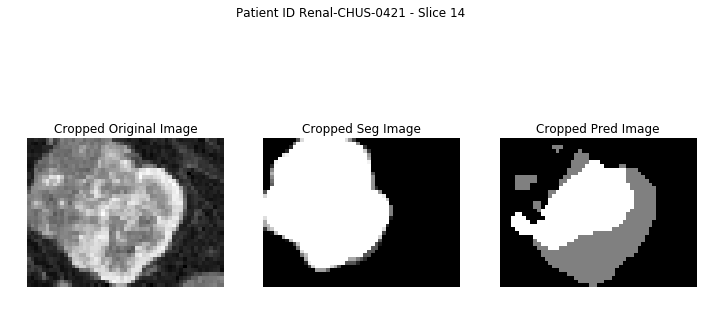

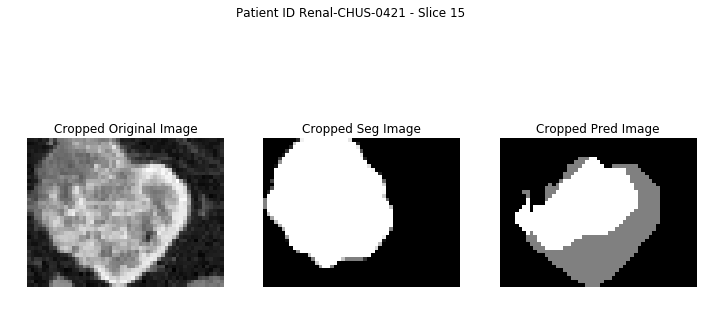

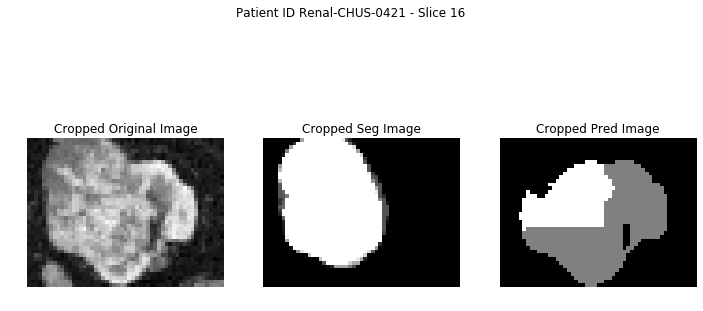

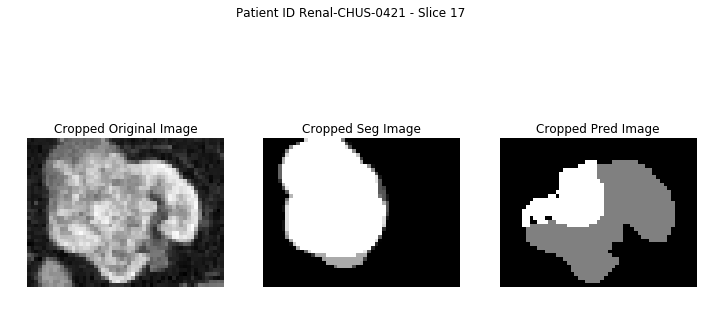

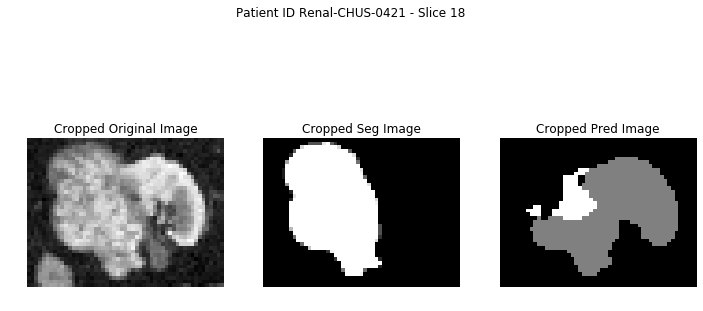

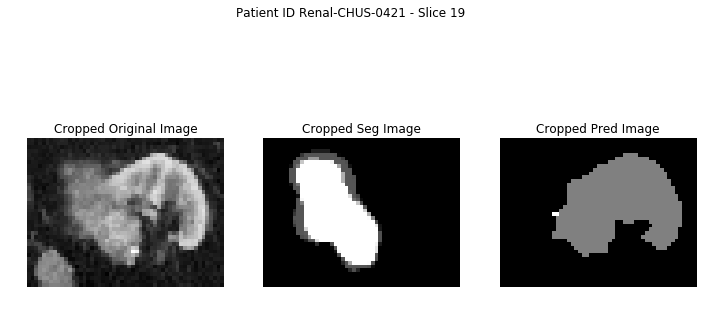

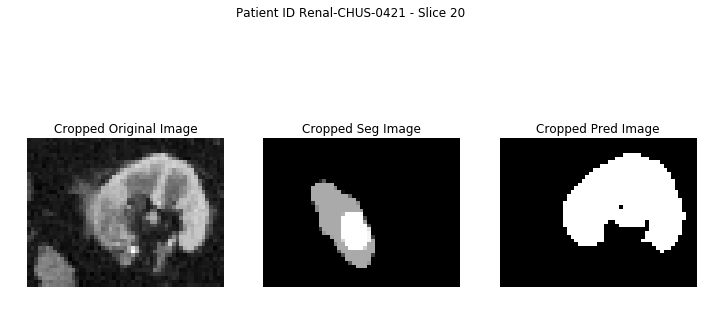

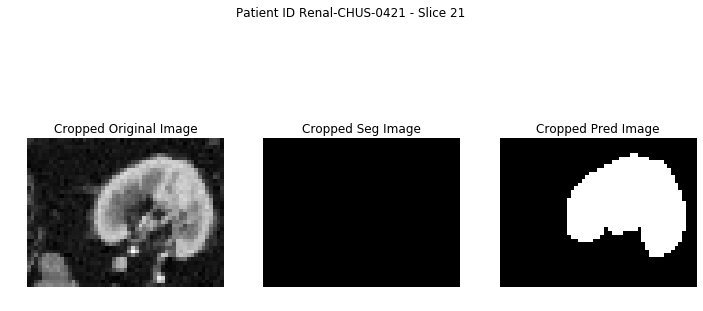

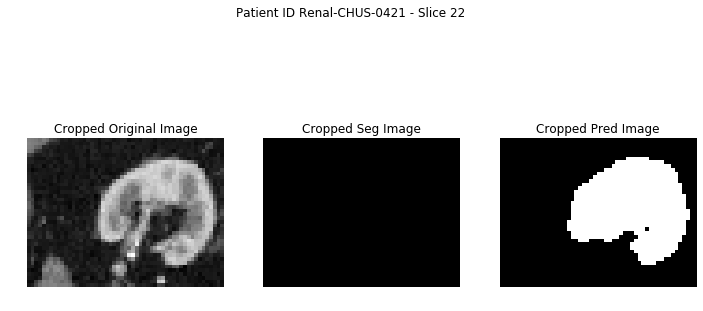

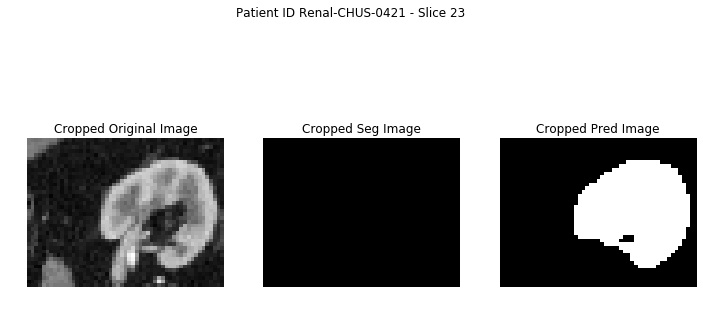

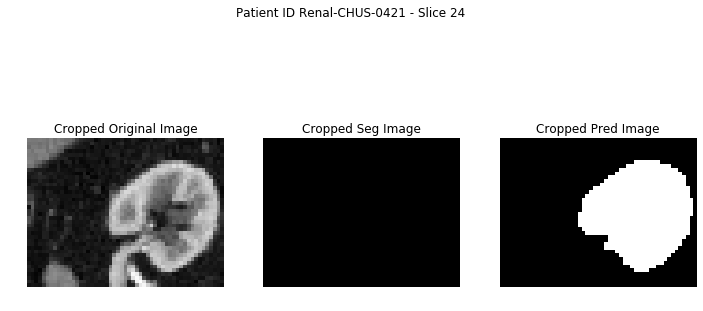

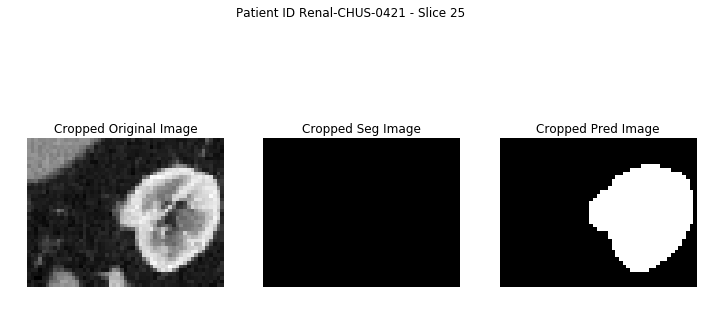

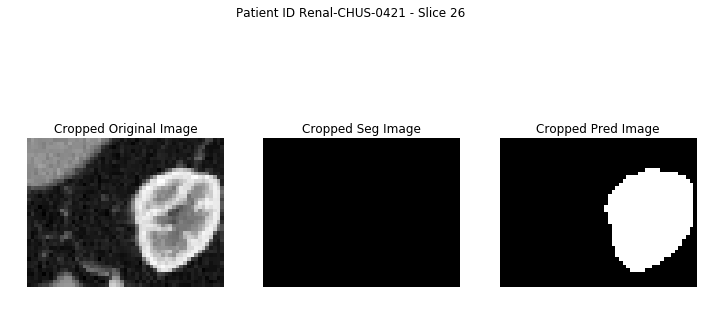

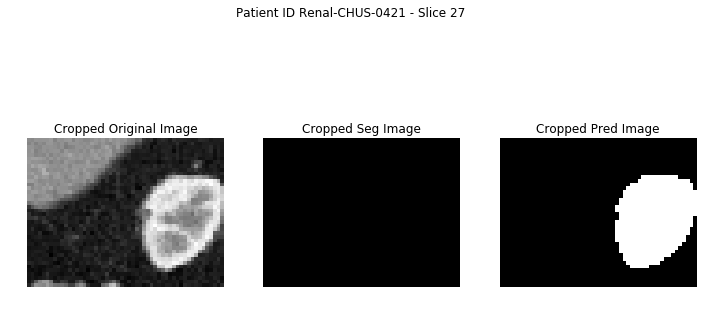

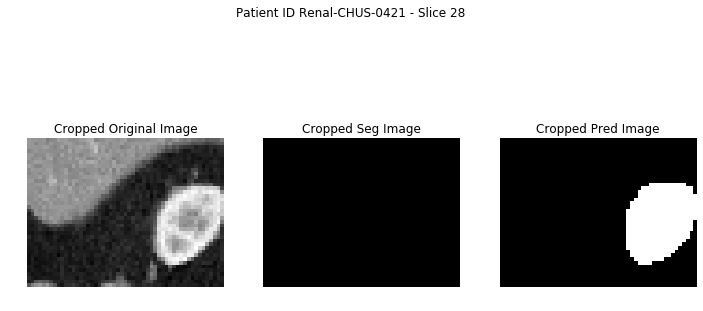

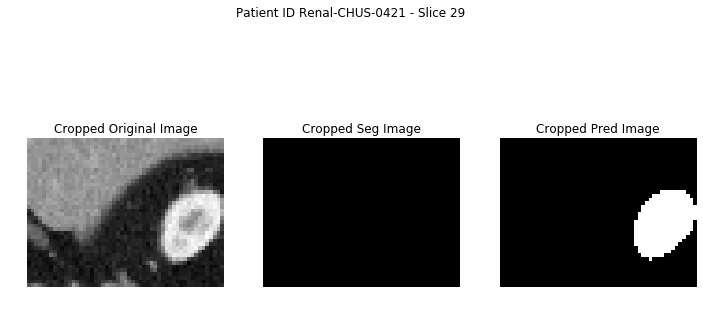

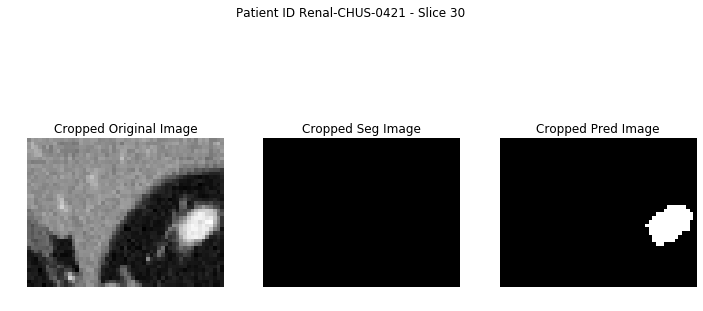

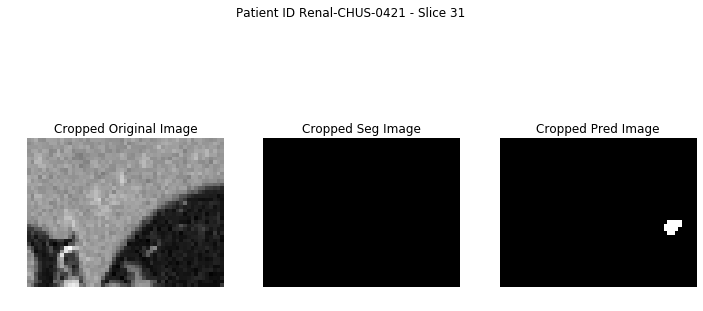

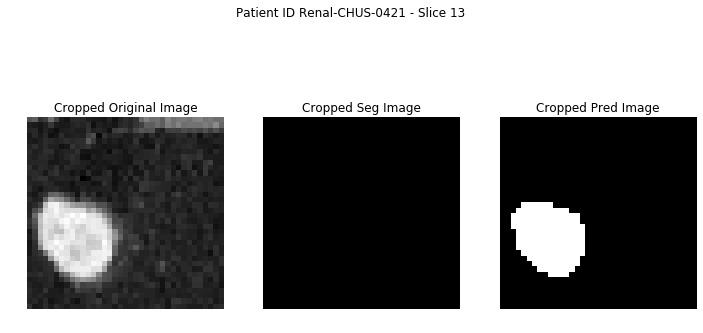

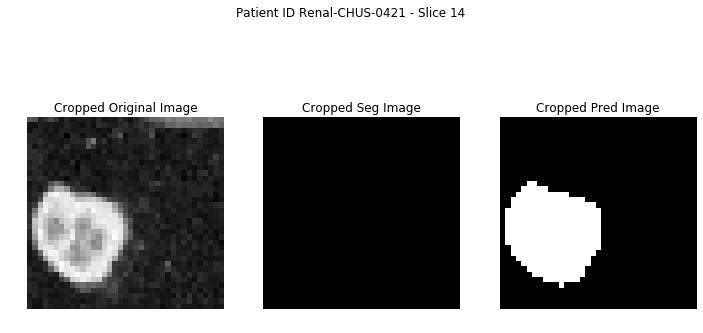

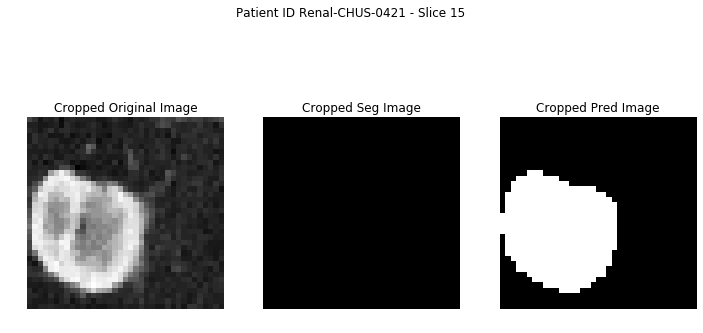

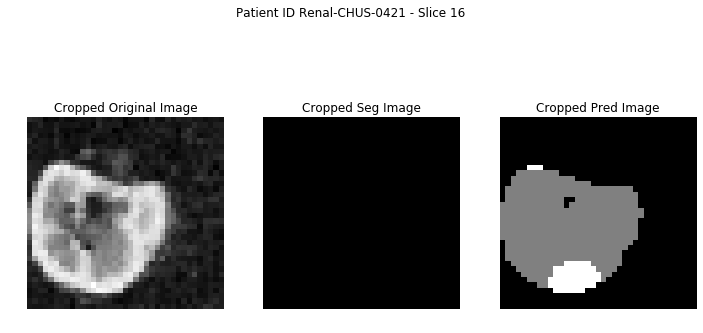

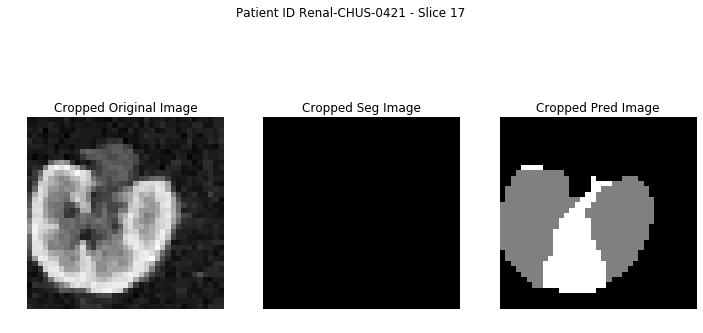

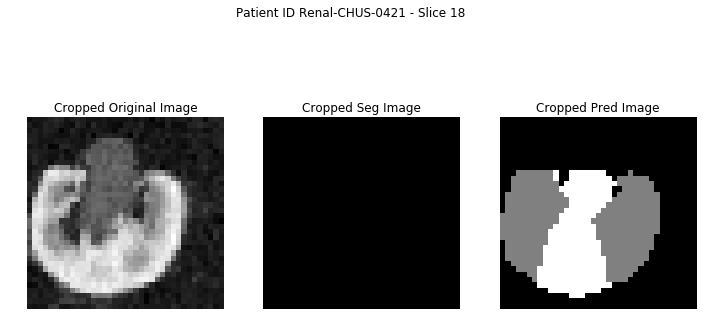

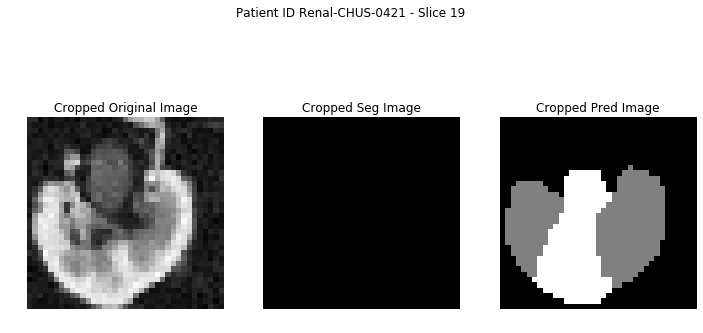

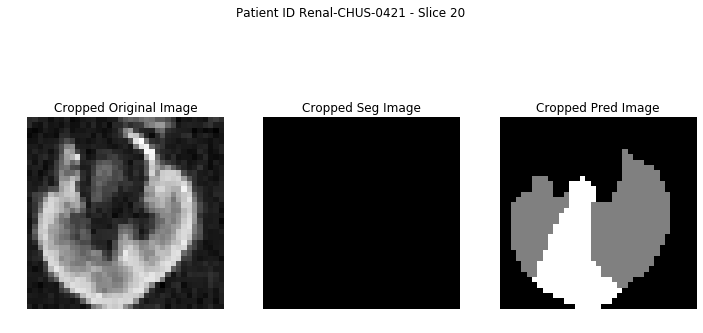

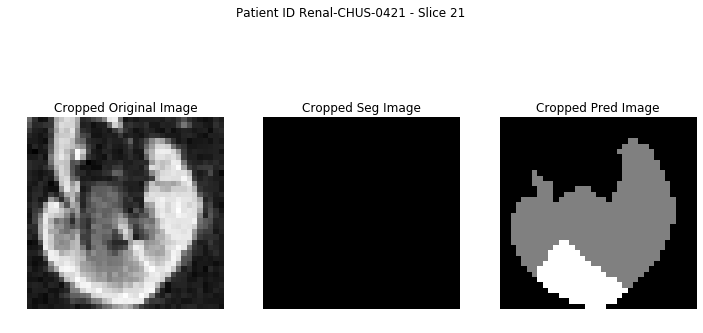

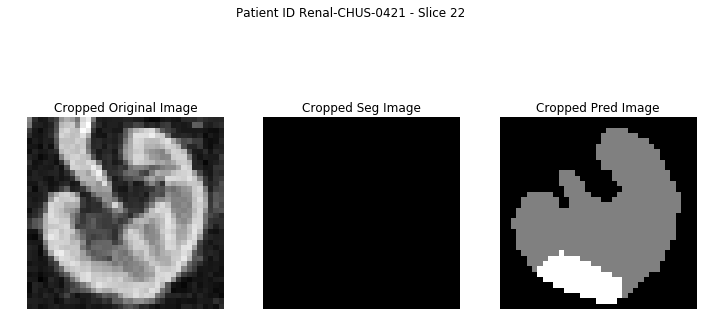

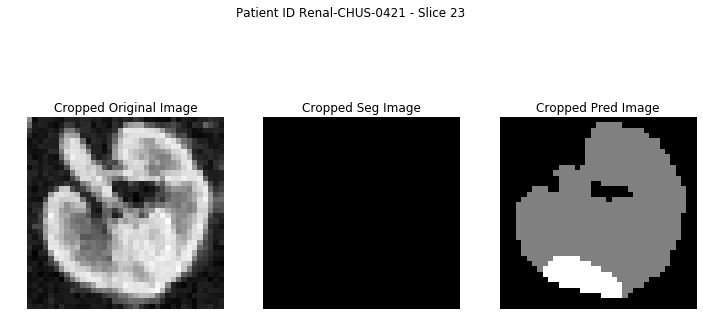

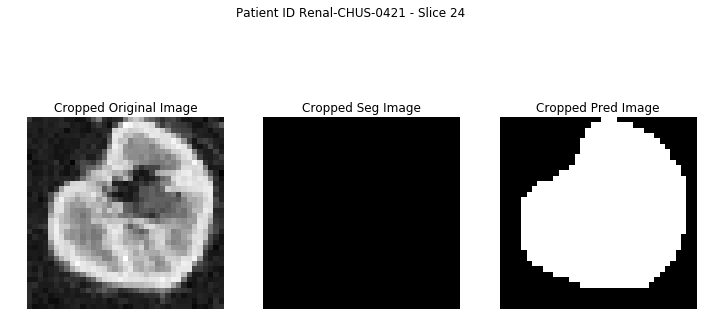

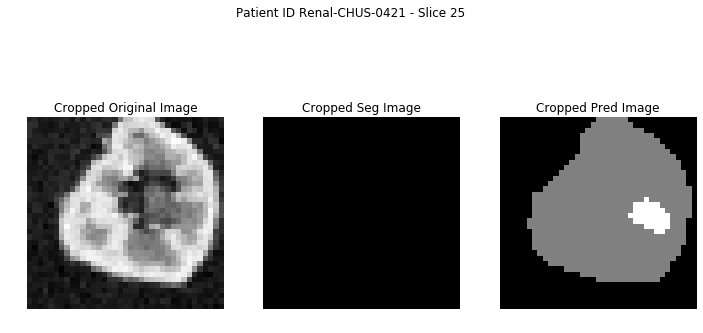

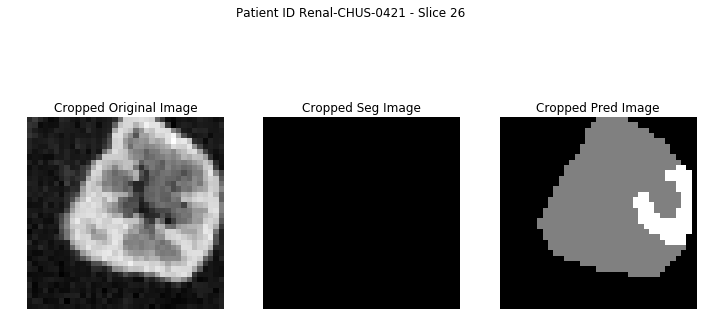

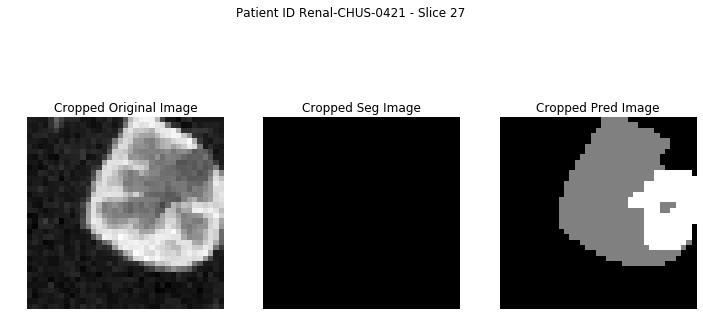

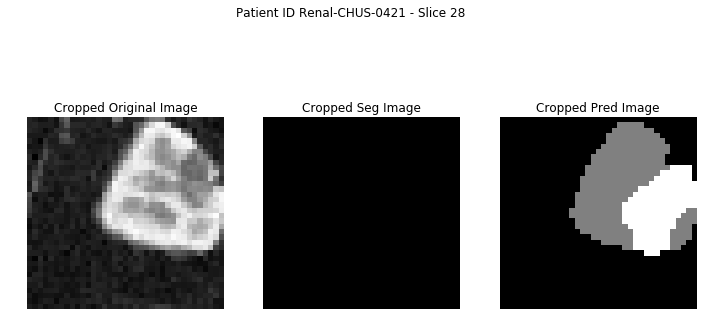

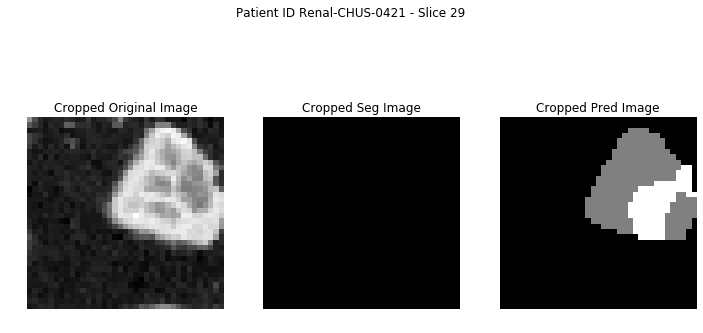

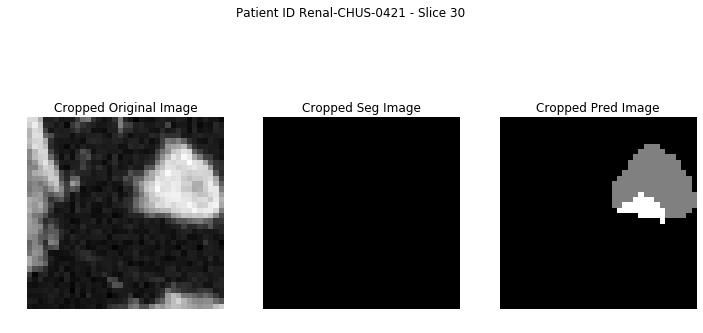

In [6]:
for i in range(len(data['root'])):
    bounding_boxes = ast.literal_eval(data['bbox'][i]) 
    patient_id = data['root'][i]
    resized_img, resized_seg, pred = load_resized_data(data, i)

    # Create a loop that takes all boxes and crop 
    for box, j in zip(bounding_boxes, ast.literal_eval(data['tumor_presence'][i])):
        crop_img, crop_seg, crop_pred, crop_depth = crop(resized_img, resized_seg, pred, box)
        plot_cropped_fig(crop_img, crop_seg, crop_pred, pred, crop_depth, box, patient_id)

    break


### Crop to Unified Field of View

In [ ]:
in_path = "/projects/renal/srm-detection-main/outputs/segmentation/bounding_boxes_csv"

val_data = pd.read_csv(os.path.join(in_path, "kidney_bbox_unlabeled_test_set.csv")) 
data = pd.read_csv(os.path.join(in_path, "kidney_bbox_unlabeled_train_set.csv")) 
areas_df = pd.read_csv(os.path.join(in_path,"all_bbox_areas_with_dimensions.csv"))

In [ ]:
# Get the indices of the maximum 5 values from column 'A'
max_indices = areas_df['Areas'].nlargest(5).index

# Get the corresponding rows from the DataFrame
max_rows = areas_df.loc[max_indices]

max_rows

In [ ]:
areas_df['Areas'].describe()

In [ ]:
q3 = areas_df.loc[areas_df['Areas'] > 70000]  #38280
q3 = q3.loc[q3['Areas'] < 80000]
q3

In [ ]:
largest_x_len = 50
largest_y_len = 96
largest_z_len = 104

# sample 716 area 71036 // sample 753 with area 49140
q3_x_len = 28#26  
q3_y_len = 59#45
q3_z_len = 43#42

output_folder = "/projects/renal/srm-detection-main/outputs/segmentation/cropped_kidneys_gifs"

def get_box_centers(box):
    x_start , y_start, z_start, x_len, y_len, z_len = box
    x_center = x_start + x_len // 2
    y_center = y_start + y_len // 2 
    z_center = z_start + z_len // 2 
    return x_center, y_center, z_center

for i in range(len(data['root'])):
    bounding_boxes = ast.literal_eval(data['bbox'][i]) 
    patient_id = data['root'][i]   # use patient ID to get patient Clinical Data (Rcc vs non-RCC) and (Tumor location)
    resized_img, resized_seg, pred = load_resized_data(data, i)

    # Create a loop that takes all boxes and crop 
    for box, j in zip(bounding_boxes, ast.literal_eval(data['tumor_presence'][i])):
        # modify box area
        x_center, y_center, z_center = get_box_centers(box)
        new_x = x_center - q3_x_len // 2
        new_y = y_center - q3_y_len // 2
        new_z = z_center - q3_z_len // 2
        new_x_len = q3_x_len
        new_y_len = q3_y_len
        new_z_len = q3_z_len
        new_box = (new_x, new_y, new_z, new_x_len, new_y_len, new_z_len)
        crop_img, crop_seg, crop_pred, crop_depth = crop(resized_img, resized_seg, pred, new_box)
        plot_cropped_fig(crop_img, crop_seg, crop_pred, pred, crop_depth, box, patient_id)
        save_crop_gif(resized_img, resized_seg, pred, new_box, patient_id,output_folder)
        
